#### Dataset

In [2]:
# Datset: Social_Network_Ads.csv
# Location: https://mitu.co.in/dataset

#### Import the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('Social_Network_Ads.csv')

In [7]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


#### Separate the input and output data

In [9]:
x = df[['Age','EstimatedSalary']]
y = df['Purchased']

In [10]:
x.isnull().sum()

Age                0
EstimatedSalary    0
dtype: int64

#### Output variables analysis

In [12]:
set(y)

{0, 1}

In [13]:
np.unique(y)

array([0, 1])

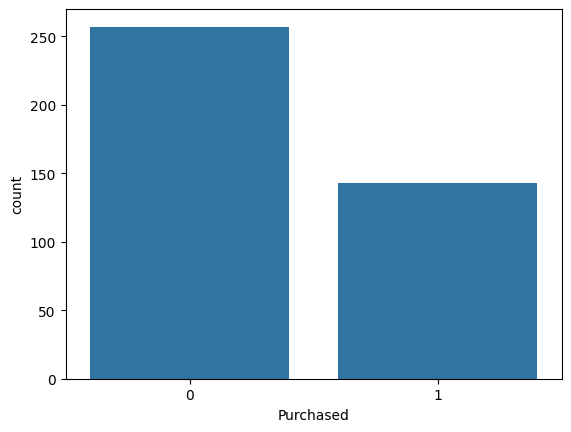

In [14]:
sns.countplot(x = y);

In [15]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [16]:
from collections import Counter
Counter(y)

Counter({0: 257, 1: 143})

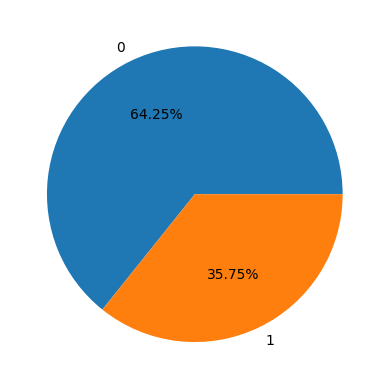

In [21]:
plt.pie(y.value_counts(), autopct='%2.2f%%', labels=[0,1]);

#### Exploratory Data Analysis

In [23]:
x.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


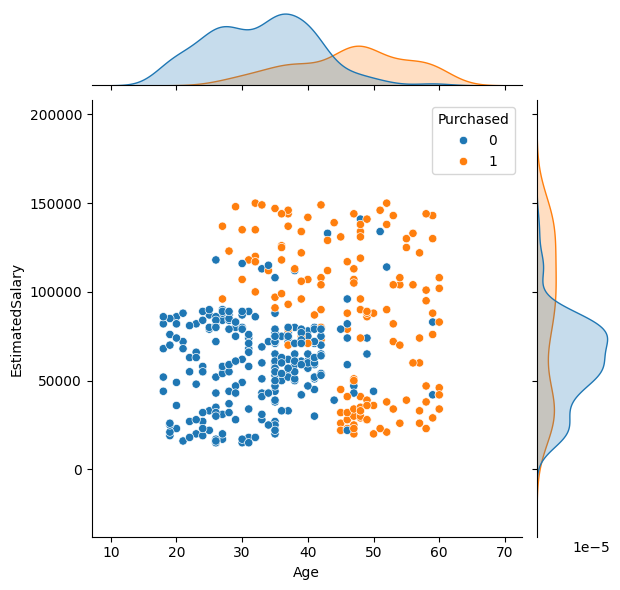

In [24]:
sns.jointplot(x='Age', y='EstimatedSalary', data=df, hue='Purchased')

#### Feature Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [42]:
x_scaled;

#### Cross Validation

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [45]:
x_train.shape

(300, 2)

In [46]:
x_test.shape

(100, 2)

#### Build the model

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
classifier = LogisticRegression()

In [49]:
classifier.fit(x_train, y_train)

LogisticRegression()

##### Prediction on the unseen data

In [50]:
y_pred = classifier.predict(x_test)

In [51]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [53]:
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [54]:
result

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,0
264,1,1


#### Performance Evaluation

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [57]:
confusion_matrix(y_test, y_pred)

array([[67,  1],
       [10, 22]])

In [58]:
y_test.value_counts()

Purchased
0    68
1    32
Name: count, dtype: int64

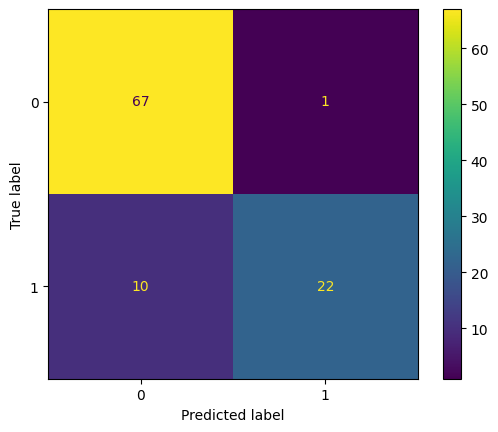

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [60]:
accuracy_score(y_test, y_pred)

0.89

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



In [62]:
# Recall of class-0 / Class Accuracy - 0 / Sensitivity 
r0 = 67/68
r0

0.9852941176470589

In [63]:
# Recall of class-1 / Class Accuracy - 1 / Specificity
r1 = 22/32
r1

0.6875

In [64]:
# Precision of class-0 / Positive Predictive Value
p0 = 67/77
p0 

0.8701298701298701

In [65]:
# Precision of class-1 / Negative Predictive Value
p1 = 22/23
p1 

0.9565217391304348

In [66]:
f0 = 2 * (p0 * r0) / (p0 + r0)
f0

0.9241379310344828

In [67]:
f1 = 2 * (p1 * r1) / (p1 + r1)
f1

0.8

#### Prediction on new data

In [69]:
new = pd.DataFrame({
    'Age': [23,37,56],
    'EstimatedSalary': [12000, 67000, 134000]
})

In [70]:
new

,Age,EstimatedSalary
0,23,12000
1,37,67000
2,56,134000


In [72]:
classifier.predict(scaler.transform(new))

array([0, 0, 1])

In [73]:
classifier.predict_proba(scaler.transform(new))

array([[0.97244977, 0.02755023],
       [0.71077655, 0.28922345],
       [0.07086465, 0.92913535]])